# homework 5

In [191]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle as pkl

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (8,5)

working through a numeric/ simulted solution to Bayes' Theorem.

goal: find P(signal|data) using Bayes' Theorem

# Problem 1

background: signal-free with a million events, normal distribution with some modest $\sigma$, in the range 2-5 (here chosen 3)

signal: random strength on the interval of 0-20 (here chosen 20), uniform distribution

<ipython-input-192-8cb6a036053c>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

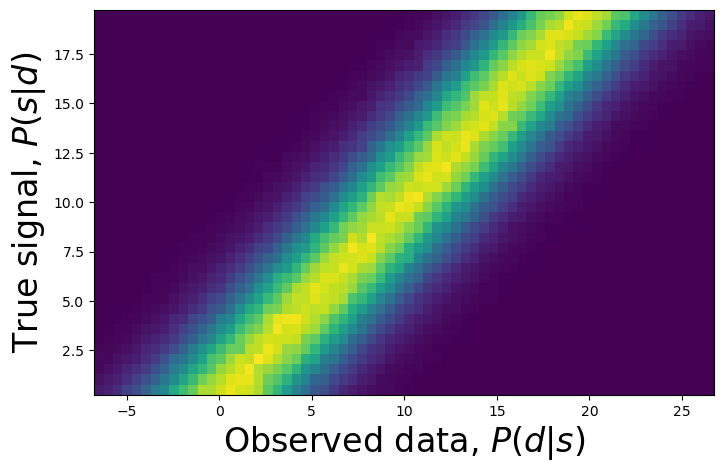

In [192]:
# making 2D hisograms, signal vs simulated data readings

bkgd = stats.norm.rvs(loc=0,scale=3, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

## problem 1b

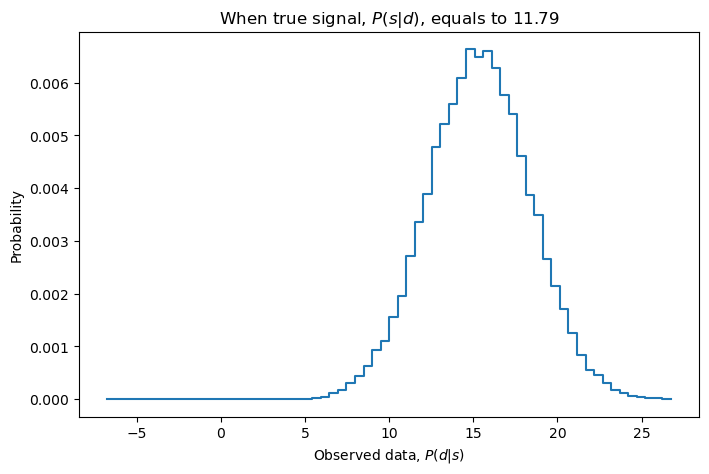

In [193]:
plt.step(datacenters, Psd[:,30])
plt.title('When true signal, $P(s|d)$, equals to '+str(np.round(signaledges[23],2)))
plt.xlabel('Observed data, $P(d|s)$')
plt.ylabel('Probability')
plt.show()

Chosen a horizontal stripe of the 2D histogram above, with the true signal P(s|d) equals to 11.79 within one sigma. 
Then the step plot shows the each probability of the observed signal under the true signal 0f 11.79.

# problem 1c

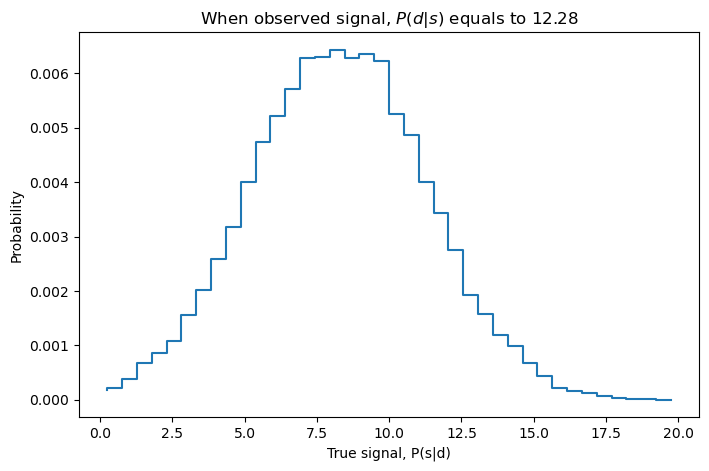

In [194]:
plt.step(signalcenters,Psd[30,:])
plt.title('When observed signal, $P(d|s)$ equals to ' + str(np.round(dataedges[38],2)))
plt.xlabel('True signal, P(s|d)')
plt.ylabel('Probability')
plt.show()

Chosen a vertical stripe of the 2D histogram above, with the observed signal P(d|s) equals to 11.79 within one sigma. Here, the observed reading is the sum of signal and background.
Then the step plot shows the each probability of the true signal under the observed signal 0f 11.79.

Text(0.5, 0, 'True and Observed Signal for zero-mean distribution')

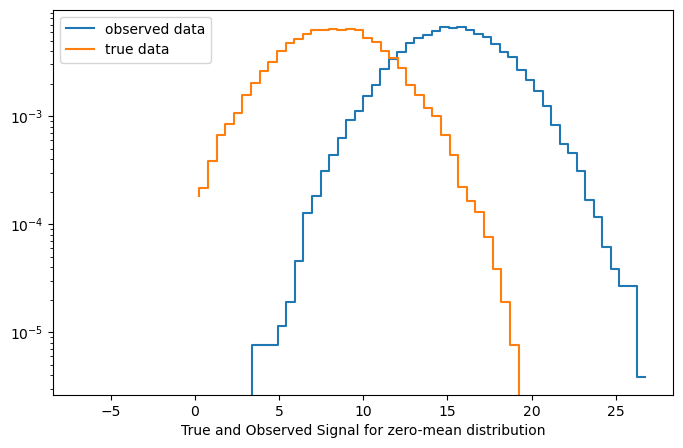

In [195]:
# problem 1d, a similar trial with problem 2
plt.step(datacenters, Psd[:,30], label="observed data")
plt.step(signalcenters,Psd[30,:], label="true data")
plt.yscale('log')
plt.legend()
plt.xlabel("True and Observed Signal for zero-mean distribution")

# problem2

repeat with the background with non-zero mean, only change the mean from zero to five.

<ipython-input-196-3fa0c2f54f50>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd_new.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

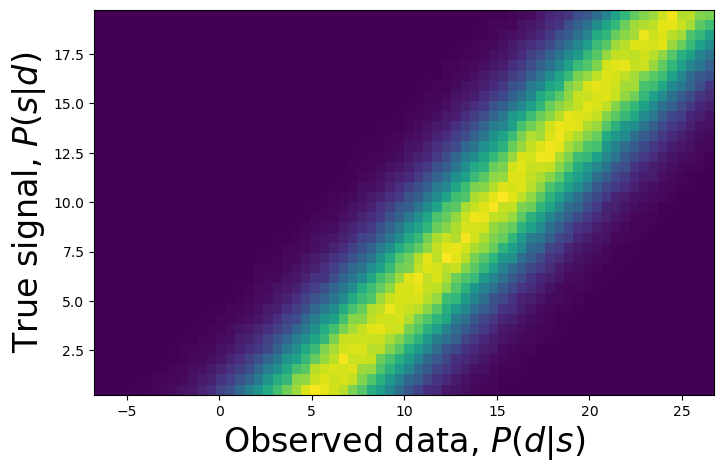

In [196]:
# making 2D hisograms, signal vs simulated data readings

bkgd_new = stats.norm.rvs(loc=5,scale=3, size = 1000000)
signal_new = stats.uniform.rvs(loc=0,scale=20, size = 1000000)

data_new = bkgd_new + signal_new

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd_new, temp_new, temp2_new= np.histogram2d(data_new,signal_new, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd_new.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

# problem 2b
reproduce the plot P(d|s)

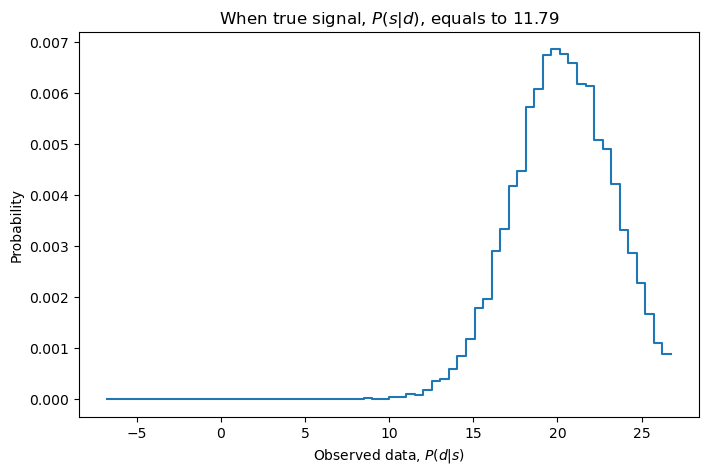

In [197]:
plt.step(datacenters, Psd_new[:,30])
plt.title('When true signal, $P(s|d)$, equals to '+str(np.round(signaledges[23],2)))
plt.xlabel('Observed data, $P(d|s)$')
plt.ylabel('Probability')
plt.show()

# problem 2c
reproduce the plot P(s|d)

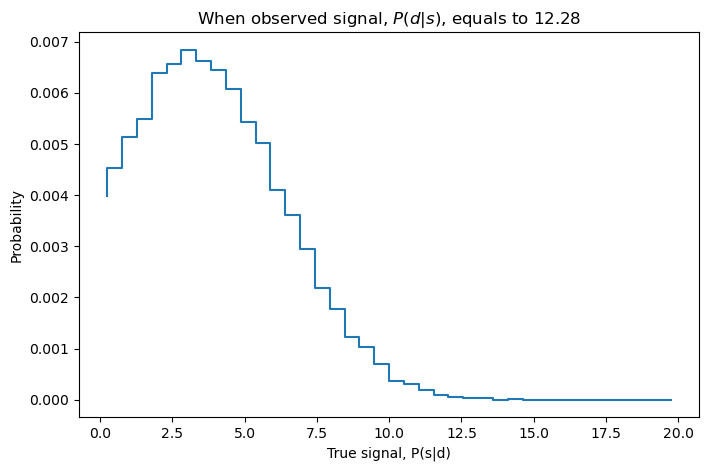

In [198]:
plt.step(signalcenters,Psd_new[30,:])
plt.title('When observed signal, $P(d|s)$, equals to ' + str(np.round(dataedges[38],2)))
plt.xlabel('True signal, P(s|d)')
plt.ylabel('Probability')
plt.show()

# problem 2d
overplot the P(d|s) and P(s|d) plots

Text(0.5, 0, 'True and Observed Signal for non-zero mean distribution')

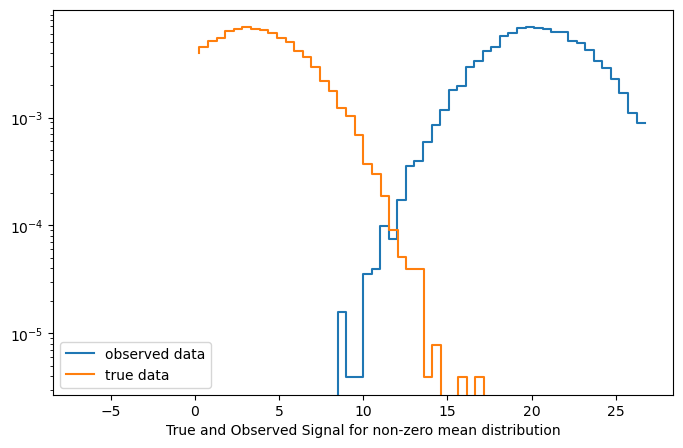

In [199]:
plt.step(datacenters, Psd_new[:,30], label="observed data")
plt.step(signalcenters,Psd_new[30,:], label="true data")
plt.yscale('log')
plt.legend()
plt.xlabel("True and Observed Signal for non-zero mean distribution")

Why are they not centered on the same value? Explain carefully.

Because there is the background signal between true and observed signal. Since we assume the background signal not equal to zero, then they will always center at different values. <br>
Meanwhile, the center of true number is decreasing about 5 compared with the zero-mean distribution. And the center of observed number is increasing about 5 compared with the zero-mean distribution. This change is corresponding to the background changes. <br>
Also, as we known, P(d|s) and P(s|d) are different measurements. P(a|b) is the conditional probability, measuring the probability of a under the condition b.